<a href="https://colab.research.google.com/github/jiwonly/Ddareungi/blob/main/data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [17]:
from google.colab import files
uploaded=files.upload()




Saving 대여소 정보_수정본.xlsx to 대여소 정보_수정본 (1).xlsx


In [33]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

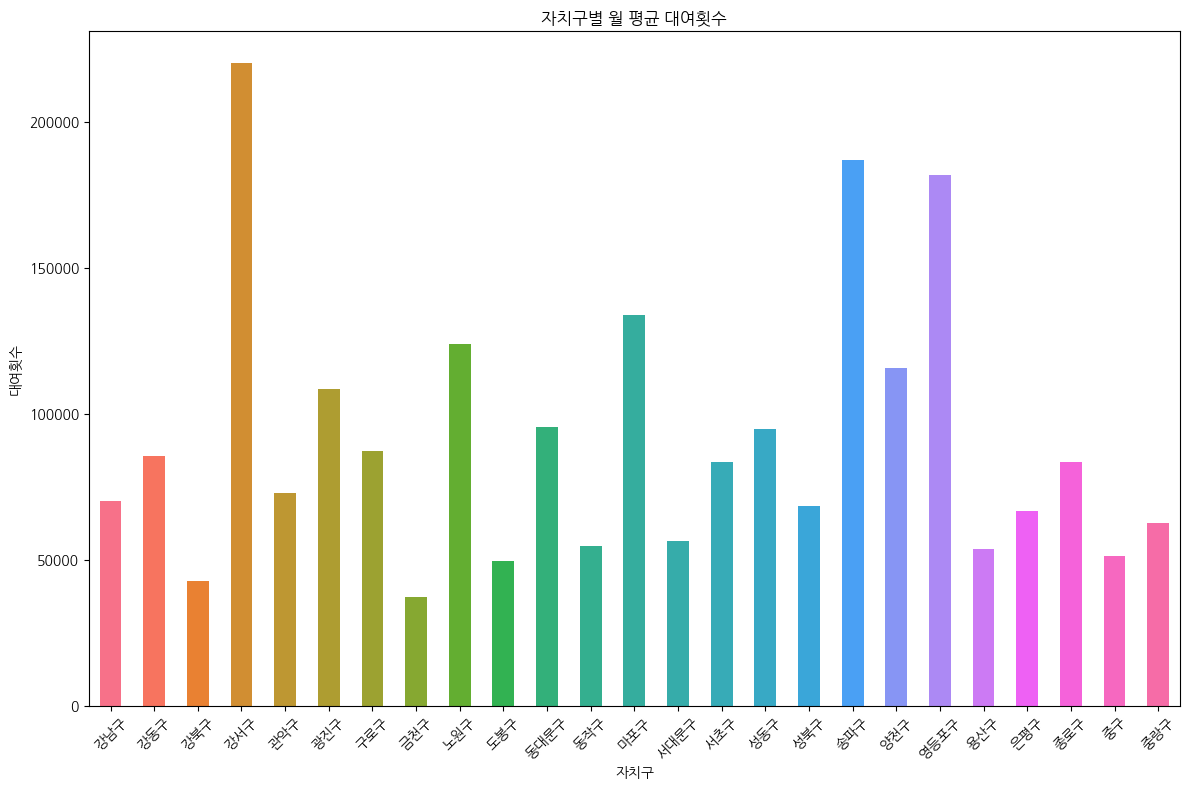

In [34]:
import pandas as pd #데이터 분석 및 조작
import matplotlib.pyplot as plt #데이터 시각화
import seaborn as sns #데이터 시각화(더 세련)

#한글로 잘 출력되도록
plt.rcParams['font.family'] = 'NanumGothic'

data = {
    '월': [1, 2, 3, 4, 5, 6],
    '강남구': [24746, 38734, 67403, 100149, 89945, 99707],
    '강동구': [26195, 43287, 77636, 110539, 112181, 143647],
    '강북구': [16140, 23395, 40773, 57238, 55181, 63661],
    '강서구': [75056, 108048, 205076, 282076, 289198, 361535],
    '관악구': [27496, 38485, 67844, 97162, 94537, 112114],
    '광진구': [38393, 62803, 109724, 145509, 139343, 154983],
    '구로구': [31669, 46955, 83905, 119457, 112171, 130692],
    '금천구': [13534, 18451, 34468, 52079, 46718, 58141],
    '노원구': [42031, 61592, 110227, 161408, 167226, 200532],
    '도봉구': [16662, 25904, 45446, 65248, 65900, 78774],
    '동대문구': [33457, 48879, 86145, 161408, 113602, 130745],
    '동작구': [18987, 29542, 53135, 75183, 71680, 80544],
    '마포구': [48687, 75534, 130787, 179679, 173054, 195800],
    '서대문구': [23104, 31805, 58112, 74664, 70227, 81963],
    '서초구': [29517, 46882, 80052, 119083, 108086, 116954],
    '성동구': [35857, 57664, 96034, 129241, 119673, 131121],
    '성북구': [26170, 38516, 67314, 90455, 87494, 100254],
    '송파구': [54843, 95687, 174586, 254196, 248833, 294394],
    '양천구': [43366, 61890, 107903, 144955, 151021, 185528],
    '영등포구': [64385, 103044, 183618, 249495, 229619, 260410],
    '용산구': [18239, 29290, 50204, 74046, 73358, 77508],
    '은평구': [25482, 36577, 64372, 87328, 85863, 101832],
    '종로구': [35679, 49249, 81365, 109919, 101060, 124232],
    '중구': [19510, 27478, 47612, 68185, 63519, 82593],
    '중랑구': [22816, 34855, 60487, 82342, 82888, 93103]
}

# 딕셔너리를 pandas의 DataFrame으로 변환
df = pd.DataFrame(data)

plt.figure(figsize=(12, 8)) #그래프 크기 : 가로 12인치, 세로 8인치

# 자치구 색상 : husl 팔레트 사용 (첫번째 열 제외)
colors = sns.color_palette("husl", len(df.columns) - 1)

# 평균계산, 막대그래프
df.iloc[:, 1:].mean().plot(kind='bar', color=colors)

# 축 레이블 및 제목 설정
plt.xlabel('자치구')
plt.ylabel('대여횟수')
plt.title('자치구별 월 평균 대여횟수')

# x축 레이블 회전 및 레이아웃 조정
plt.xticks(rotation=45)
plt.tight_layout() # 자동 레이아웃 조정
plt.show()

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving 대여소 정보_수정본.xlsx to 대여소 정보_수정본.xlsx


In [7]:

import pandas as pd
import folium

# 엑셀 파일 읽기
df = pd.read_excel('대여소 정보_수정본.xlsx')

# 데이터 배열 초기화
data = []

# 각 행을 딕셔너리로 변환하여 데이터 배열에 추가
for index, row in df.iterrows():
    d = {
        '번호': row['대여소 번호'],
        '대여소명': row['대여소명'],
        '자치구': row['자치구'],
        '상세주소': row['상세주소'],
        '위도': row['위도'],
        '경도': row['경도'],
        '설치시기': row['설치시기'],
        '거치대수(LCD)': row['거치대수(LCD)'],
        '거치대수(QR)': row['거치대수(QR)'],
        '운영방식': row['운영방식']
    }
    data.append(d)

# 지도 생성 및 설정
m = folium.Map(
    location=[37.5665, 126.9780],
    tiles='OpenStreetMap',
    zoom_start=12
)

# 대여소 데이터를 반복하여 마커 추가
for d in data:
    if d['자치구'] == '강남구':
        marker_color = 'blue'
    else:
        marker_color = 'red'

    folium.CircleMarker(
        location=[d['위도'], d['경도']],
        radius=3,
        color=marker_color,
        fill=True,
        fill_color=marker_color,
        popup=d['대여소명']
    ).add_to(m)

# 지도 출력
m



In [8]:
import random
import pandas as pd
import folium

# 엑셀 파일 읽기
df = pd.read_excel('대여소 정보_수정본.xlsx')

# 데이터 배열 초기화
data = []

# 각 행을 딕셔너리로 변환하여 데이터 배열에 추가
for index, row in df.iterrows():
    d = {
        '번호': row['대여소 번호'],
        '대여소명': row['대여소명'],
        '자치구': row['자치구'],
        '상세주소': row['상세주소'],
        '위도': row['위도'],
        '경도': row['경도'],
        '설치시기': row['설치시기'],
        '거치대수(LCD)': row['거치대수(LCD)'],
        '거치대수(QR)': row['거치대수(QR)'],
        '운영방식': row['운영방식']
    }
    data.append(d)

# 지도 생성 및 설정
m = folium.Map(
    location=[37.5665, 126.9780],
    tiles='OpenStreetMap',
    zoom_start=12
)
# Create a dictionary to store the colors for each district
district_colors = {}

# 대여소 데이터를 반복하여 마커 추가
for d in data:
    district = d['자치구']

    # Set marker color based on the district
    if district not in district_colors:
        # Generate a random color if the district color is not set
        district_colors[district] = '#' + ''.join(random.choices('0123456789ABCDEF', k=6))

    marker_color = district_colors[district]

    folium.CircleMarker(
        location=[d['위도'], d['경도']],
        radius=3,
        color=marker_color,
        fill=True,
        fill_color=marker_color,
        popup=f"{d['대여소명']} ({district})"  # Display district information in the popup
    ).add_to(m)

m